<a href="https://colab.research.google.com/github/RivadineiraVargas/Comparativa-PSO-GA/blob/main/Comparativa_PSO_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSO


----- RUN 1 -----
a =  0.49808542
b =  1.02312120
c = -0.29420577
MSE = 8.344772e-10
R2 = 0.999999984995

----- RUN 2 -----
a =  0.49806406
b =  1.02315810
c = -0.29421631
MSE = 9.647642e-10
R2 = 0.999999982652

----- RUN 3 -----
a =  0.49824065
b =  1.02288790
c = -0.29413106
MSE = 4.093606e-09
R2 = 0.999999926391

----- RUN 4 -----
a =  0.49807972
b =  1.02312976
c = -0.29420899
MSE = 8.588324e-10
R2 = 0.999999984557

----- RUN 5 -----
a =  0.49808942
b =  1.02311536
c = -0.29420430
MSE = 8.276518e-10
R2 = 0.999999985118

----- RUN 6 -----
a =  0.49809798
b =  1.02309690
c = -0.29419774
MSE = 8.346275e-10
R2 = 0.999999984992

----- RUN 7 -----
a =  0.49807705
b =  1.02312691
c = -0.29420532
MSE = 8.945481e-10
R2 = 0.999999983915

----- RUN 8 -----
a =  0.49809404
b =  1.02311343
c = -0.29420465
MSE = 8.309270e-10
R2 = 0.999999985059

----- RUN 9 -----
a =  0.49809914
b =  1.02309629
c = -0.29419646
MSE = 8.710869e-10
R2 = 0.999999984337

----- RUN 10 -----
a =  0.49808622
b =  1.023

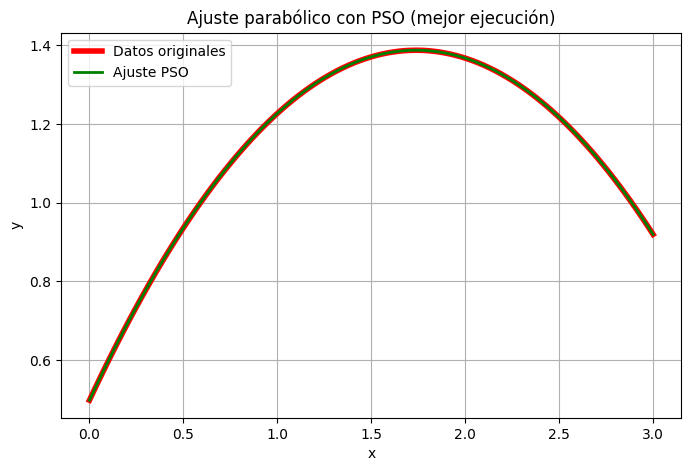

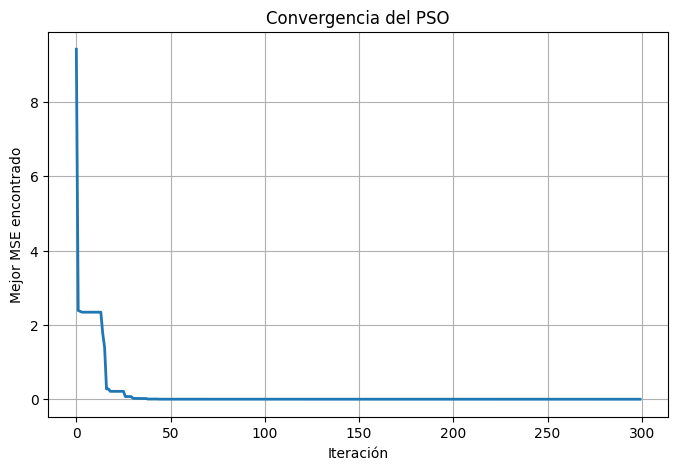

In [ ]:
!pip install scikit-opt
from sko.PSO import PSO

import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt("x_data.txt")
y = np.loadtxt("y_data.txt")

n_runs = 10
results = []

def pso_cost(params):
    a, b, c = params
    y_pred = a + b*x + c*x**2
    return np.mean((y - y_pred)**2)



for i in range(n_runs):
    print(f"\n----- RUN {i+1} -----")

    # PSO
    pso = PSO(
        func=pso_cost,
        n_dim=3,
        pop=80,
        max_iter=300,
        lb=[-5, -5, -5],
        ub=[5, 5, 5],
        w=0.7, #0,8
        c1=1.8, #2,0
        c2=2.1  #2,0
    )

    best_x, best_f = pso.run()

    #RMSE
    rmse = np.sqrt(best_f)

    # calculo R2
    y_pred = best_x[0] + best_x[1] * x + best_x[2] * x**2
    SS_res = np.sum((y - y_pred)**2)
    SS_tot = np.sum((y - np.mean(y))**2)
    R2 = 1 - SS_res / SS_tot

    #SSE
    SSE = np.sum((y - y_pred)**2)

    results.append({
        "run": i+1,
        "a": best_x[0],
        "b": best_x[1],
        "c": best_x[2],
        "mse": best_f[0],
        "rmse": rmse[0],
        "R2": R2,
        "SSE": SSE
    })

    print(f"a = {best_x[0]: .8f}")
    print(f"b = {best_x[1]: .8f}")
    print(f"c = {best_x[2]: .8f}")
    print(f"MSE = {best_f[0]:.6e}")
    print(f"R2 = {R2:.12f}")

# ----- Estadísticas finales -----

a_vals = np.array([r["a"] for r in results])
b_vals = np.array([r["b"] for r in results])
c_vals = np.array([r["c"] for r in results])
rmse_vals = np.array([r["rmse"] for r in results])
R2_vals = np.array([r["R2"] for r in results])

# OUT

print("\n//////////////// ESTADÍSTICAS //////////////")
print(f"a: mean={a_vals.mean():.10f}, std={a_vals.std():.3e}")
print(f"b: mean={b_vals.mean():.10f}, std={b_vals.std():.3e}")
print(f"c: mean={c_vals.mean():.10f}, std={c_vals.std():.3e}")
print(f"RMSE: mean={rmse_vals.mean():.6e}, std={rmse_vals.std():.3e}")
print(f"R2: mean={R2_vals.mean():.12f}, std={R2_vals.std():.3e}")

# Mejor ejecución
best_idx = np.argmin(rmse_vals)
best_run = results[best_idx]

print("\n//////////////// MELHOR EXECUÇÃO PSO ////////////////")
print(f"Execução: {best_run['run']}")
print(f"{'Parâmetro':<10} | Valor")
print("-"*32)
print(f"{'a':<10} | {best_run['a']:.10f}")
print(f"{'b':<10} | {best_run['b']:.10f}")
print(f"{'c':<10} | {best_run['c']:.10f}")
print(f"{'MSE':<10} | {best_run['mse']:.10e}")
print(f"{'RMSE':<10} | {best_run['rmse']:.10e}")
print(f"{'R2':<10} | {best_run['R2']:.12f}")
print(f"{'SSE':<10} | {best_run['SSE']:.10e}")

print("\n//////////////// SSE ////////////////")
print(SSE)

# PLOTS - CURVA
best = results[best_idx]
a_best, b_best, c_best = best["a"], best["b"], best["c"]

y_pred_best = a_best + b_best * x + c_best * x**2

plt.figure(figsize=(8,5))
plt.plot(x, y, color='red', linewidth=4, label='Datos originales')
plt.plot(x, y_pred_best, linewidth=2, label='Ajuste PSO', color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste parabólico con PSO (mejor ejecución)")
plt.legend()
plt.grid(True)
plt.show()

# PLOTS - CONVERGENCIA
plt.figure(figsize=(8,5))
plt.plot(pso.gbest_y_hist, linewidth=2)
plt.xlabel("Iteración")
plt.ylabel("Mejor MSE encontrado")
plt.title("Convergencia del PSO")
plt.grid(True)
plt.show()



# G.A


----- GA RUN 1 -----
a = 0.59475791
b = 0.87822054
c = -0.25197867
MSE = 1.132334e-03
R2 = 0.979639024573

----- GA RUN 2 -----
a = 1.01770905
b = 0.27167019
c = -0.07246736
MSE = 3.242008e-02
R2 = 0.417040915486

----- GA RUN 3 -----
a = 0.63587513
b = 0.91038440
c = -0.27363505
MSE = 3.132262e-03
R2 = 0.943677467410

----- GA RUN 4 -----
a = 0.82200405
b = 0.57674300
c = -0.15817348
MSE = 1.394017e-02
R2 = 0.749335940277

----- GA RUN 5 -----
a = 0.52868698
b = 0.95774268
c = -0.27201031
MSE = 2.319165e-04
R2 = 0.995829812377

----- GA RUN 6 -----
a = 0.80057588
b = 0.52821618
c = -0.13475862
MSE = 1.377845e-02
R2 = 0.752243944461

----- GA RUN 7 -----
a = 0.47589530
b = 1.06046614
c = -0.30679438
MSE = 9.139453e-05
R2 = 0.998356596493

----- GA RUN 8 -----
a = 0.06558050
b = 1.63256121
c = -0.45489084
MSE = 2.450718e-02
R2 = 0.559326040825

----- GA RUN 9 -----
a = 0.26039455
b = 1.41560947
c = -0.42002302
MSE = 8.383362e-03
R2 = 0.849255234881

----- GA RUN 10 -----
a = 0.27041223

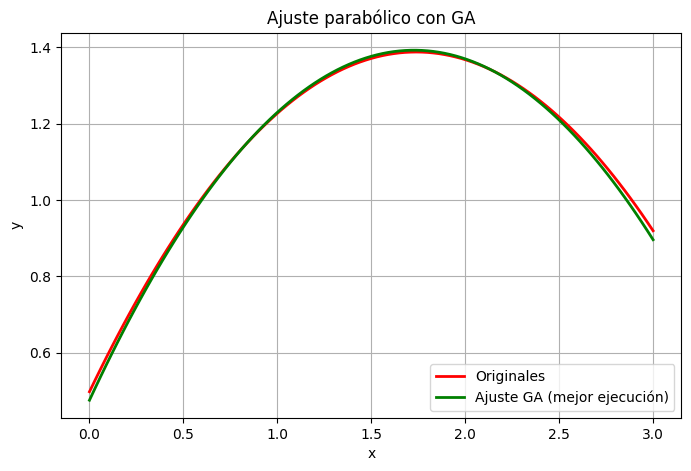

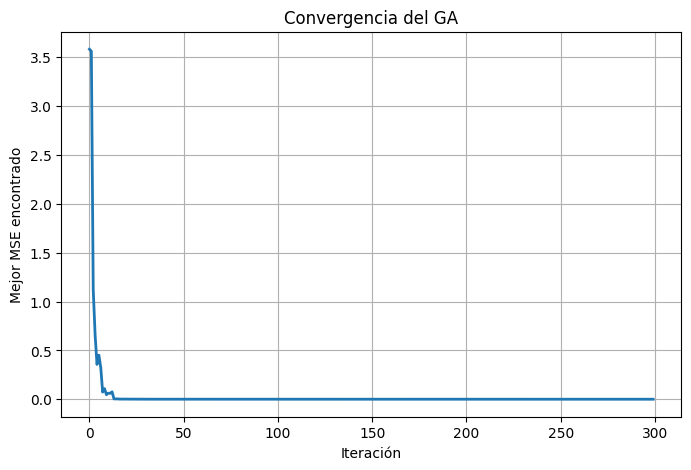

In [ ]:
from sko.GA import GA

def ga_cost(params):
    a, b, c = params
    return np.mean((y - (a + b * x + c * x**2))**2)

n_runs = 10
results_ga=[]

for i in range(n_runs):
    print(f"\n----- GA RUN {i+1} -----")

    ga = GA(
        func=ga_cost,
        n_dim=3,
        size_pop=80,
        max_iter=300,
        lb=[-5, -5, -5],
        ub=[5, 5, 5],
        prob_mut = 0.02
    )

    best_x, best_f = ga.run()

    #RMSE
    rmse = np.sqrt(best_f)

    # calculo R2
    a, b, c = best_x
    y_pred = a + b * x + c * x**2
    SS_res = np.sum((y - y_pred)**2)
    SS_tot = np.sum((y - np.mean(y))**2)
    R2 = 1 - SS_res / SS_tot

    #SSE
    SSE = np.sum((y - y_pred)**2)

    results_ga.append({
        "run": i+1,
        "a": a,
        "b": b,
        "c": c,
        "mse": best_f[0],
        "rmse": rmse[0],
        "R2": R2,
        "history": [min(gen) for gen in ga.all_history_Y],
        "SSE": SSE
    })

    print(f"a = {a:.8f}")
    print(f"b = {b:.8f}")
    print(f"c = {c:.8f}")
    print(f"MSE = {best_f[0]:.6e}")
    print(f"R2 = {R2:.12f}")


a_vals = np.array([r["a"] for r in results_ga])
b_vals = np.array([r["b"] for r in results_ga])
c_vals = np.array([r["c"] for r in results_ga])
mse_vals = np.array([r["mse"] for r in results_ga])
rmse_vals = np.array([r["rmse"] for r in results_ga])
R2_vals = np.array([r["R2"] for r in results_ga])

# OUT

print("\n//////////////// ESTADÍSTICAS ////////////////")
print(f"a: mean={a_vals.mean():.10f}, std={a_vals.std():.3e}")
print(f"b: mean={b_vals.mean():.10f}, std={b_vals.std():.3e}")
print(f"c: mean={c_vals.mean():.10f}, std={c_vals.std():.3e}")
print(f"MSE: mean={mse_vals.mean():.6e}, std={mse_vals.std():.3e}")
print(f"RMSE: mean={rmse_vals.mean():.6e}, std={rmse_vals.std():.3e}")
print(f"R2: mean={R2_vals.mean():.12f}, std={R2_vals.std():.3e}")

best_idx_ga = np.argmin(mse_vals)
print("\n//////////////// MELHOR EXECUÇÃO GA ////////////////")
best_ga_run = results_ga[best_idx_ga]

print(f"Execução: {best_ga_run['run']}")
print(f"{'Parâmetro':<10} | Valor")
print("-"*32)
print(f"{'a':<10} | {best_ga_run['a']:.10f}")
print(f"{'b':<10} | {best_ga_run['b']:.10f}")
print(f"{'c':<10} | {best_ga_run['c']:.10f}")
print(f"{'MSE':<10} | {best_ga_run['mse']:.10e}")
print(f"{'RMSE':<10} | {best_ga_run['rmse']:.10e}")
print(f"{'R2':<10} | {best_ga_run['R2']:.12f}")
print(f"{'SSE':<10} | {best_ga_run['SSE']:.10e}")
print("\n//////////////// SSE ////////////////")
print(SSE)

# PLOTS - CURVA
best_ga = results_ga[best_idx_ga]
a_best, b_best, c_best = best_ga["a"], best_ga["b"], best_ga["c"]
ga_best_history = results_ga[best_idx_ga]["history"]


y_pred_ga = a_best + b_best * x + c_best * x**2

plt.figure(figsize=(8,5))
plt.plot(x, y, label="Originales", color="red", linewidth=2)
plt.plot(x, y_pred_ga, label="Ajuste GA (mejor ejecución)", color="green", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste parabólico con GA")
plt.grid(True)
plt.legend()
plt.show()

# PLOTS - CONVERGENCIA
plt.figure(figsize=(8,5))
plt.plot(ga_best_history, linewidth=2)
plt.xlabel("Iteración")
plt.ylabel("Mejor MSE encontrado")
plt.title("Convergencia del GA")
plt.grid(True)
plt.show()

# G.A vs. PSO

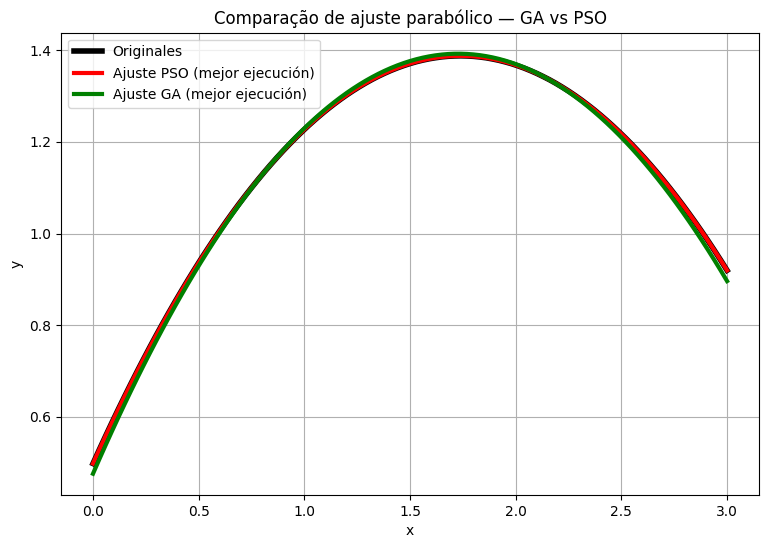

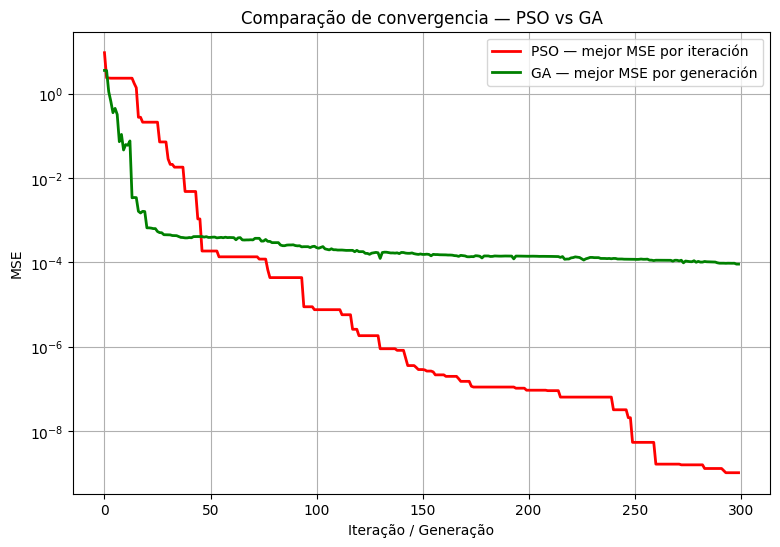

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


#Ajuste parabólico

plt.figure(figsize=(9,6))
plt.plot(x, y, label="Originales", color="black", linewidth=4)
plt.plot(x, y_pred_best, label="Ajuste PSO (mejor ejecución)", color="red", linewidth=3)
plt.plot(x, y_pred_ga, label="Ajuste GA (mejor ejecución)", color="green", linewidth=3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparação de ajuste parabólico — GA vs PSO")
plt.grid(True)
plt.legend()
plt.show()


#Convergencia


plt.figure(figsize=(9,6))
plt.plot(pso.gbest_y_hist, label="PSO — mejor MSE por iteración", color="red", linewidth=2)
plt.plot(ga_best_history, label="GA — mejor MSE por generación", color="green", linewidth=2)
plt.xlabel("Iteração / Generação")
plt.ylabel("MSE")
plt.title("Comparação de convergencia — PSO vs GA")
plt.grid(True)
plt.legend()
plt.yscale("log")
plt.show()
